In [7]:
import numpy as np
import cv2
from scipy.special import j1
from scipy.fft import fft2, ifft2, fftfreq
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from PIL import Image

In [2]:
from utils import *

In [3]:
!wget https://raw.githubusercontent.com/antimatter15/cameraman/refs/heads/master/cameraman.tif

--2025-03-31 22:02:45--  https://raw.githubusercontent.com/antimatter15/cameraman/refs/heads/master/cameraman.tif
Risoluzione di raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connessione a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 65240 (64K) [image/tiff]
Salvataggio in: «cameraman.tif.1»

cameraman.tif.1     100%[===================>]  63,71K  --.-KB/s    in 0,02s   

2025-03-31 22:02:46 (2,66 MB/s) - «cameraman.tif.1» salvato [65240/65240]



In [4]:
vanilla_image = Image.open('cameraman.tif')
vanilla_image.save('cameraman.png')

In [5]:
# Open the image and convert to grayscale (if not already)
vanilla_image = Image.open('cameraman.png').convert('L')  # 'L' converts to 8-bit grayscale

# Convert the image into Numpy array
vanilla_image = np.array(vanilla_image)

# Normalize the image
vanilla_image = vanilla_image / 255.0

print(vanilla_image.shape)
print(vanilla_image)      

(256, 256)
[[0.61176471 0.62352941 0.61960784 ... 0.59215686 0.59607843 0.59607843]
 [0.62745098 0.60392157 0.61568627 ... 0.60392157 0.60784314 0.6       ]
 [0.61176471 0.62352941 0.61960784 ... 0.59215686 0.59607843 0.59607843]
 ...
 [0.44705882 0.51764706 0.48235294 ... 0.52941176 0.5372549  0.44705882]
 [0.4745098  0.49411765 0.50980392 ... 0.52156863 0.50980392 0.44313725]
 [0.4745098  0.49411765 0.50980392 ... 0.52156863 0.50980392 0.44313725]]


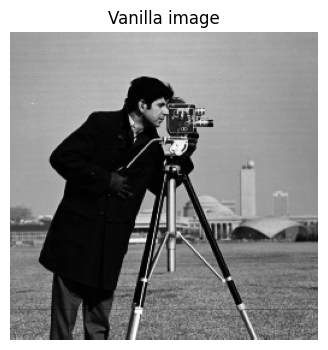

In [6]:
plt.figure(figsize=(4, 4))
plt.title("Vanilla image")
plt.imshow(vanilla_image,  cmap='gray')
plt.axis('off')
plt.show()

In [24]:
# Parameters
kernel_size = 15
sigma = 2

# Kernel creation
gaussian_blur_kernel = gaussian_kernel(kernel_size, sigma)

# Apply Gaussian blurring
gaussian_blurred_image = convolve2d(vanilla_image,
                                    gaussian_blur_kernel,
                                    mode='same',
                                    boundary='wrap')

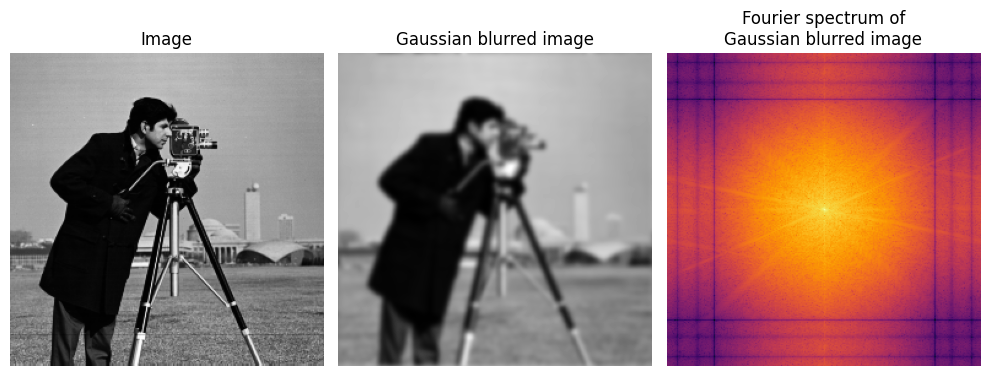

In [ ]:
# Fourier transform of the blurred image
ft_gaussian_blurred_img = ft(gaussian_blurred_image)

plotting_imgs(vanilla_image,
              gaussian_blurred_image,
              ft_gaussian_blurred_img,
              filter="Gaussian")

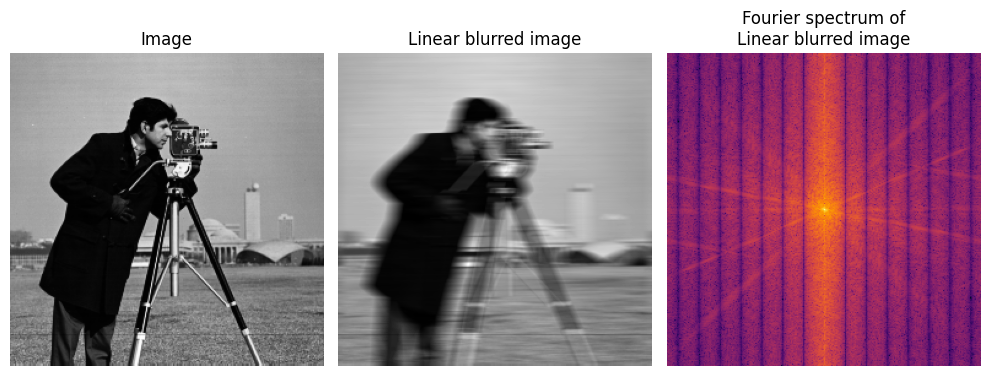

In [28]:
# Parameters
kernel_size = 15
angle = 0   # (in degrees)

# Kernel creation
linear_kernel = linear_motion_blur_kernel(kernel_size, angle)

# Applying linear motion blur
blurred_image = convolve2d(vanilla_image,
                           linear_kernel,
                           mode='same',
                           boundary='wrap')

# Fourier transform of the blurred image
ft_lin_blurred_img = ft(blurred_image)

plotting_imgs(vanilla_image,
              blurred_image,
              ft_lin_blurred_img,
              filter="Linear")